# **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**
## 1. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?  
K-Nearest Neighbors (KNN) dapat digunakan untuk deteksi outlier karena prinsip dasarnya adalah mengukur kedekatan (proximity) suatu titik data dengan titik data lainnya dalam ruang multidimensi. Outlier biasanya adalah titik yang memiliki jarak yang jauh dari tetangga terdekatnya dibandingkan dengan data lain dalam kumpulan data.

Beberapa alasan utama mengapa KNN dapat digunakan untuk deteksi outlier:

- Mengukur Kepadatan Data: KNN menghitung jarak antar titik data. Titik yang memiliki jarak rata-rata lebih besar terhadap K tetangga terdekatnya dibandingkan dengan titik lain kemungkinan besar adalah outlier.
- Non-parametrik: KNN tidak membuat asumsi distribusi data, sehingga dapat mendeteksi outlier dalam berbagai bentuk distribusi data.
- Dapat Digunakan dengan Berbagai Metode: Beberapa metode berbasis KNN untuk deteksi outlier termasuk KNN Distance, KNN Density, dan Local Outlier Factor (LOF).  

## 2. Langkah-Langkah Deteksi Outlier dengan KNN  
**Langkah 1: Persiapan Data**
- Impor dataset yang akan dianalisis.
- Lakukan pra-pemrosesan seperti menangani nilai yang hilang dan melakukan normalisasi jika diperlukan.

**Langkah 2: Menentukan Parameter K**
- Pilih jumlah tetangga
𝐾
K yang optimal.
- Nilai
𝐾
K yang terlalu kecil dapat membuat deteksi outlier terlalu sensitif terhadap noise, sedangkan nilai
𝐾
K yang terlalu besar dapat mengurangi sensitivitas terhadap outlier.

**Langkah 3: Menghitung Jarak Antar Titik Data**
- Gunakan metrik jarak seperti Euclidean Distance, Manhattan Distance, atau metrik lainnya untuk mengukur kedekatan antar titik data.

**Langkah 4: Menentukan Skor Outlier**

Beberapa pendekatan yang dapat digunakan:
1. KNN Distance: Hitung rata-rata jarak dari sebuah titik ke
𝐾
K tetangga terdekatnya. Jika jarak ini tinggi dibandingkan dengan titik lain, maka titik tersebut kemungkinan adalah outlier.
2. KNN Density: Mengukur kerapatan titik berdasarkan jumlah tetangga dalam radius tertentu. Titik dengan kepadatan rendah dianggap sebagai outlier.
3. Local Outlier Factor (LOF): Menggunakan perbandingan kepadatan lokal titik terhadap tetangganya. Jika kepadatan suatu titik jauh lebih rendah dibandingkan dengan tetangganya, maka titik tersebut kemungkinan besar outlier.

**Langkah 5: Menentukan Threshold untuk Outlier**
- Tetapkan ambang batas (threshold) berdasarkan distribusi skor outlier.
- Titik yang memiliki skor di atas threshold dikategorikan sebagai outlier.

**Langkah 6: Visualisasi dan Interpretasi**
- Gunakan scatter plot atau box plot untuk melihat distribusi data dan mendeteksi outlier secara visual.
- Bisa juga menggunakan histogram atau metode dimensionality reduction seperti PCA untuk melihat pola data yang lebih jelas.


## Kesimpulan  
KNN efektif untuk mendeteksi outlier karena mengukur kedekatan antar titik tanpa asumsi distribusi. Dengan metode berbasis jarak dan kepadatan seperti KNN Distance dan LOF, KNN dapat mengidentifikasi data yang menyimpang. Pemilihan K yang tepat dan visualisasi data membantu meningkatkan akurasi deteksi.









In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00


Perintah %pip install pymysql dan %pip install psycopg2 digunakan untuk menginstal pustaka yang memungkinkan Python berinteraksi dengan database MySQL dan PostgreSQL. pymysql digunakan untuk menghubungkan dan beroperasi dengan database MySQL, sementara psycopg2 berfungsi untuk berkomunikasi dengan database PostgreSQL. Dengan menginstal kedua pustaka ini, aplikasi Python dapat melakukan berbagai operasi database seperti query, insert, update, dan delete. Selain itu, penggunaan %pip install dalam Jupyter Notebook memungkinkan instalasi pustaka langsung dari dalam lingkungan notebook tanpa perlu menggunakan terminal atau command prompt.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.141421        False
  2     Iris-setosa          14.0          2.0          40.9         30.0     43.517123         True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.264575        False
  4     Iris-setosa           1.5          0.2           4.6          3.1      0.244949        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.223607        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.374166        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.316228        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.200000        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.346410    

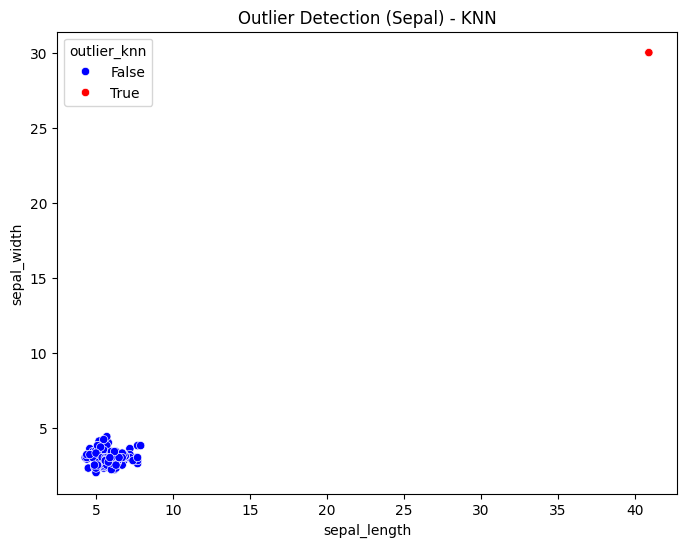

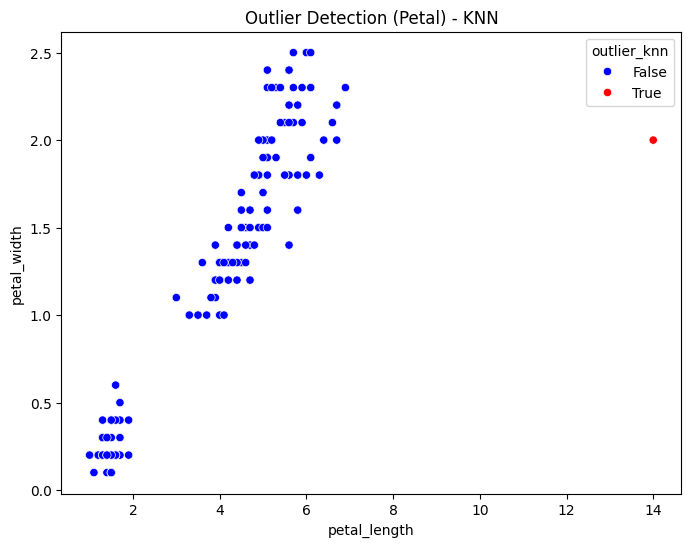

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-34d4055e-posgressqlpendataaa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_IRjo23jQlvziN0aBC2-",
        database="defaultdb",
        port=11481
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM auli.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-9b686fb-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ZuFdVS1OQkmHx4P1Wtp",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=5)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Cetak hasil
df_result = df_merged[["id", "class", "petal_length", "petal_width", "sepal_length", "sepal_width", "knn_distance", "outlier_knn"]]
print(df_result.to_string(index=False))
num_outliers = df_merged["outlier_knn"].sum()
print(f"\nJumlah outlier: {num_outliers}")

# Cetak data outlier
outliers = df_merged[df_merged["outlier_knn"]]
print("\nData Outlier:")
print(outliers.to_string(index=False))

# Visualisasi outlier berdasarkan K-NN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal) - KNN")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal) - KNN")
plt.show()

Kode ini melakukan deteksi outlier menggunakan algoritma K-Nearest Neighbors (K-NN) pada dataset gabungan dari PostgreSQL dan MySQL.

**Kesimpulan:**

1. Pengambilan dan Penggabungan Data
- Data diambil dari tabel di PostgreSQL dan MySQL, kemudian digabungkan berdasarkan kolom id dan class menggunakan metode inner join.
- Fitur numerik yang digunakan untuk analisis adalah petal_length, petal_width, sepal_length, dan sepal_width.
2. Deteksi Outlier Menggunakan K-NN
- Model K-NN dengan k=5 diterapkan untuk menghitung jarak rata-rata setiap titik terhadap tetangga terjauhnya.
- Nilai jarak ini digunakan sebagai skor untuk menilai kemungkinan suatu titik menjadi outlier.
- Sebuah threshold ditentukan sebagai rata-rata jarak + 2 standar deviasi, sehingga titik dengan jarak lebih besar dari threshold diklasifikasikan sebagai outlier.
3. Identifikasi dan Visualisasi Outlier
- Jumlah total outlier dihitung dan ditampilkan.
- Outlier divisualisasikan dalam dua scatter plot, satu untuk fitur sepal dan satu lagi untuk petal, dengan outlier ditandai warna merah.

Metode K-NN Outlier Detection ini efektif dalam mengidentifikasi titik-titik data yang berbeda secara signifikan dari kelompok utama. Hasil ini dapat digunakan untuk memahami distribusi data, menghapus anomali, atau menganalisis lebih lanjut penyebab outlier.